# Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

# What is Tensorflow?
Tensorflow architecture works in three parts:

Preprocessing the data
Build the model
Train and estimate the model
I am assuming that you know a little about the machine learning and deep learning

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist

In [6]:
type(mnist)

module

In [7]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
np.max(X_train)

255

In [10]:
np.mean(X_train)

72.94035223214286

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Data Exploation

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

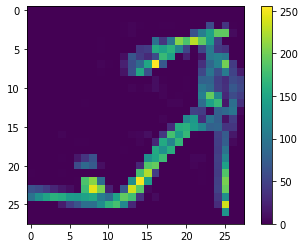

In [19]:
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()

In [20]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
X_train = X_train/255.0

In [22]:
X_test = X_test/255.0

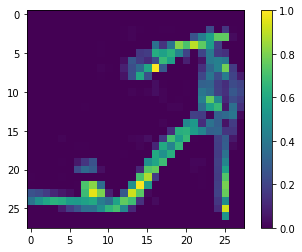

In [23]:
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()

# Build the model with TF2.0

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [25]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model Compilation

#Loss Function
Optimizer
Metrics


In [29]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,epochs=10, batch_size=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 429us/sample - loss: 0.5022 - accuracy: 0.8215 - val_loss: 0.3912 - val_accuracy: 0.8555
Epoch 2/10
48000/48000 [==============================] - 19s 403us/sample - loss: 0.3742 - accuracy: 0.8629 - val_loss: 0.4033 - val_accuracy: 0.8482
Epoch 3/10
48000/48000 [==============================] - 19s 396us/sample - loss: 0.3369 - accuracy: 0.8764 - val_loss: 0.3648 - val_accuracy: 0.8715
Epoch 4/10
48000/48000 [==============================] - 20s 416us/sample - loss: 0.3142 - accuracy: 0.8833 - val_loss: 0.3346 - val_accuracy: 0.8790
Epoch 5/10
48000/48000 [==============================] - 21s 435us/sample - loss: 0.2957 - accuracy: 0.8901 - val_loss: 0.3613 - val_accuracy: 0.8694
Epoch 6/10
48000/48000 [==============================] - 19s 394us/sample - loss: 0.2814 - accuracy: 0.8950 - val_loss: 0.3290 - val_accuracy: 0.8799
Epoch 7/10
48000/48000 [====================

In [32]:
from sklearn.metrics import accuracy_scoreuracy_score

In [36]:
y_pred = model.predict_classes(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.8828

In [38]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [39]:
pred = model.predict(X_test)

In [40]:
pred

array([[5.83163796e-07, 1.43481780e-11, 7.32173100e-10, ...,
        3.91266495e-03, 3.23828644e-08, 9.95916665e-01],
       [1.06870339e-05, 2.82952254e-21, 9.99854565e-01, ...,
        3.76894845e-32, 1.61673958e-14, 7.36412646e-21],
       [5.20490769e-13, 1.00000000e+00, 2.67949675e-17, ...,
        0.00000000e+00, 1.58209625e-17, 7.35065243e-30],
       ...,
       [1.61004188e-08, 2.52782539e-12, 1.75336332e-08, ...,
        1.11865661e-15, 9.99987841e-01, 5.18310154e-16],
       [2.84748648e-11, 9.99998331e-01, 7.84518631e-12, ...,
        3.83272193e-18, 1.08897454e-10, 4.14142109e-13],
       [1.70536589e-06, 2.62265834e-11, 1.62656238e-06, ...,
        7.51893211e-04, 1.69008435e-05, 3.68201509e-05]], dtype=float32)

In [41]:
pred[8]

array([6.6892305e-08, 1.5023770e-12, 3.3800150e-11, 9.8228581e-14,
       1.2669377e-11, 9.9999785e-01, 1.7662607e-11, 1.9842182e-06,
       1.6582946e-09, 1.0374604e-14], dtype=float32)

In [43]:
# It should predict sandal ie 5 
np.argmax(pred[8])

5